In [1]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from mpl_toolkits import mplot3d
from scipy.stats import norm


plt.style.use(['science', 'notebook', 'grid'])

# Generating a Gaussian Distribution

## Probability Density Function for a Gaussian Distribution

$$P(x) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{\ -\dfrac{(x-\mu)^2}{2\sigma^2}}$$

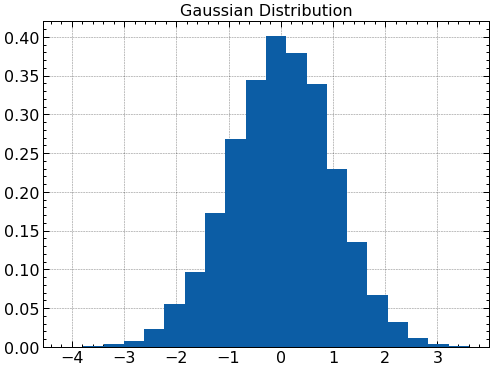

In [2]:
mean, std = 0, 1
sample = np.random.normal(mean, std, 10000)
plt.title('Gaussian Distribution')
counts, bins, ignore = plt.hist(sample, density=True, bins=20)

In [3]:
counts #height of each bin (y)

array([0.0005147 , 0.00077206, 0.00411764, 0.00746321, 0.0236764 ,
       0.05584543, 0.09702178, 0.17268333, 0.26816099, 0.34485195,
       0.40069737, 0.37882244, 0.33893285, 0.22955816, 0.13536726,
       0.06639687, 0.03191167, 0.01209555, 0.00360293, 0.00102941])

In [4]:
bins #centre of each bin (x)

array([-4.17014733, -3.78157478, -3.39300223, -3.00442968, -2.61585713,
       -2.22728459, -1.83871204, -1.45013949, -1.06156694, -0.67299439,
       -0.28442184,  0.10415071,  0.49272326,  0.88129581,  1.26986836,
        1.6584409 ,  2.04701345,  2.435586  ,  2.82415855,  3.2127311 ,
        3.60130365])

In [5]:
p_x = 1 / std * np.sqrt(2 * np.pi) * np.exp(- ((bins - mean)**2) / (2 * std**2))
p_x

array([4.19634759e-04, 1.96705971e-03, 7.92848314e-03, 2.74782546e-02,
       8.18869418e-02, 2.09829543e-01, 4.62322563e-01, 8.75890905e-01,
       1.42686018e+00, 1.99866170e+00, 2.40726354e+00, 2.49306991e+00,
       2.22009598e+00, 1.69994753e+00, 1.11924652e+00, 6.33639826e-01,
       3.08450622e-01, 1.29108640e-01, 4.64677280e-02, 1.43805018e-02,
       3.82668856e-03])

Text(0.5, 1.0, 'Probability Density Function for a Gaussian Distribution')

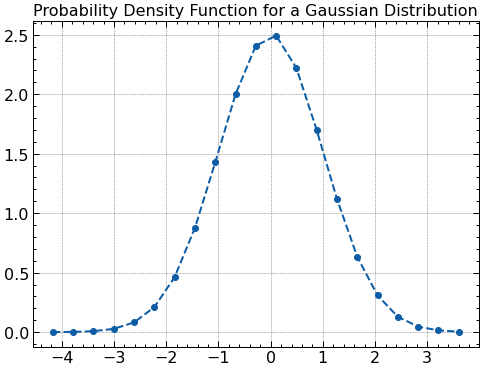

In [11]:
plt.plot(bins, p_x, 'o--')
plt.title('Probability Density Function for a Gaussian Distribution')

In [7]:
def func(bins, mean, std):
    return 1 / std * np.sqrt(2 * np.pi) * np.exp(- ((bins - mean)**2) / (2 * std**2))

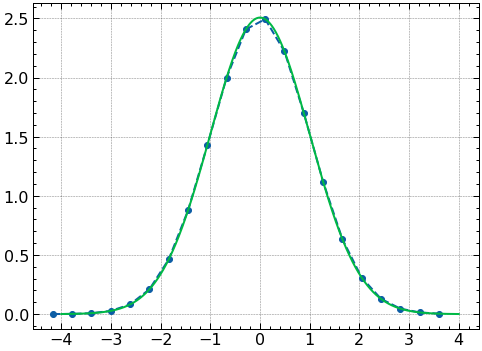

In [8]:
x = np.linspace(-4, 4, 10000)
y = func(x, 0, 1)
plt.plot(bins, p_x, 'o--')
plt.plot(x, y)

## Multiple Gaussian Distributions for different parameters

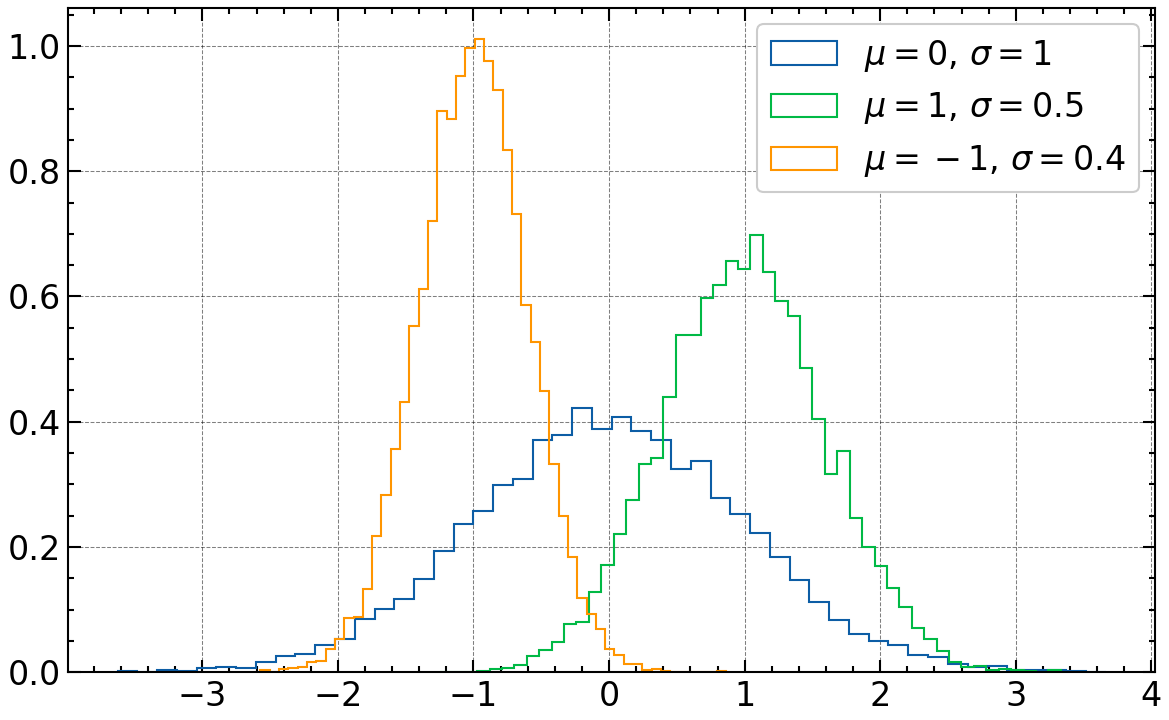

In [18]:
dist1 = np.random.normal(0, 1, 10000)
dist2 = np.random.normal(1, 0.6, 10000)
dist3 = np.random.normal(-1, 0.4, 10000)

plt.figure(figsize=(8,5), dpi=150)
plt.hist(dist1, bins=50, density=True, histtype='step',label=r'$\mu = 0$, $\sigma = 1$') 
plt.hist(dist2, bins=50, density=True, histtype='step',label=r'$\mu = 1$, $\sigma = 0.5$')
plt.hist(dist3, bins=50, density=True, histtype='step',label=r'$\mu = -1$, $\sigma = 0.4$')
plt.legend()
plt.tight_layout()
plt.show()

# Generating a Uniform Distribution U(a,b)

## Probability Density Function for a Uniform Distribution

$$p(x) = \dfrac{1}{b-a}$$

In [20]:
sample2 = np.random.uniform(-1, 1, 10000)
sample2

array([-0.00115151, -0.08747938, -0.6215669 , ..., -0.40620167,
       -0.66825291,  0.49778063])

Text(0.5, 1.0, 'Uniform Distribution')

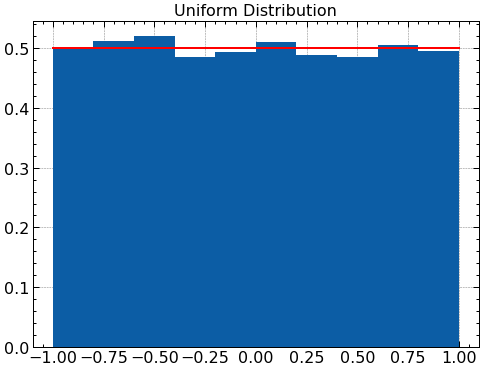

In [21]:
counts, bins, ignore = plt.hist(sample2, density=True)
plt.plot(bins, 0.5*np.ones_like(bins), linewidth=2, color='r')
plt.title('Uniform Distribution')

In [22]:
counts #y

array([0.50256113, 0.51256234, 0.52006326, 0.48605912, 0.49305997,
       0.51106216, 0.48805936, 0.48555906, 0.50556149, 0.49606034])

In [23]:
bins #x

array([-9.99871227e-01, -7.99895554e-01, -5.99919880e-01, -3.99944207e-01,
       -1.99968534e-01,  7.13975492e-06,  1.99982813e-01,  3.99958486e-01,
        5.99934160e-01,  7.99909833e-01,  9.99885506e-01])

# Generating $\pi$ using Monte Carlo Simulation

Text(0.5, 1.0, 'Points inside and outside the circle of radius 1')

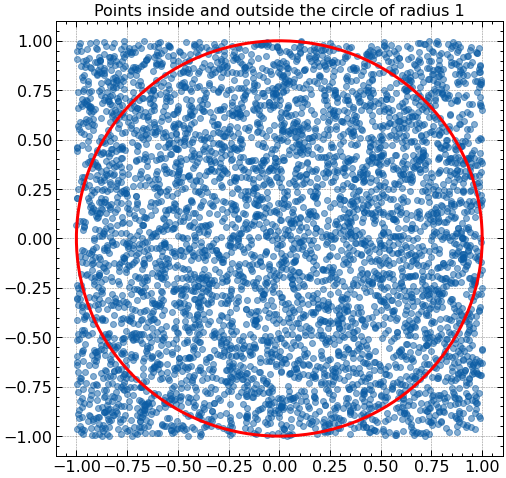

In [10]:
x_rand = np.random.uniform(-1, 1, 5000)
y_rand = np.random.uniform(-1, 1, 5000)

origin_dist = x_rand**2 + y_rand**2

theta = np.linspace( 0 , 2 * np.pi , 150 )
radius = 1
a = radius * np.cos( theta )
b = radius * np.sin( theta )
plt.figure(figsize=[8,8])
plt.scatter(x_rand, y_rand, alpha=0.5)
plt.plot(a,b, lw=3, color='red')
plt.title('Points inside and outside the circle of radius 1')

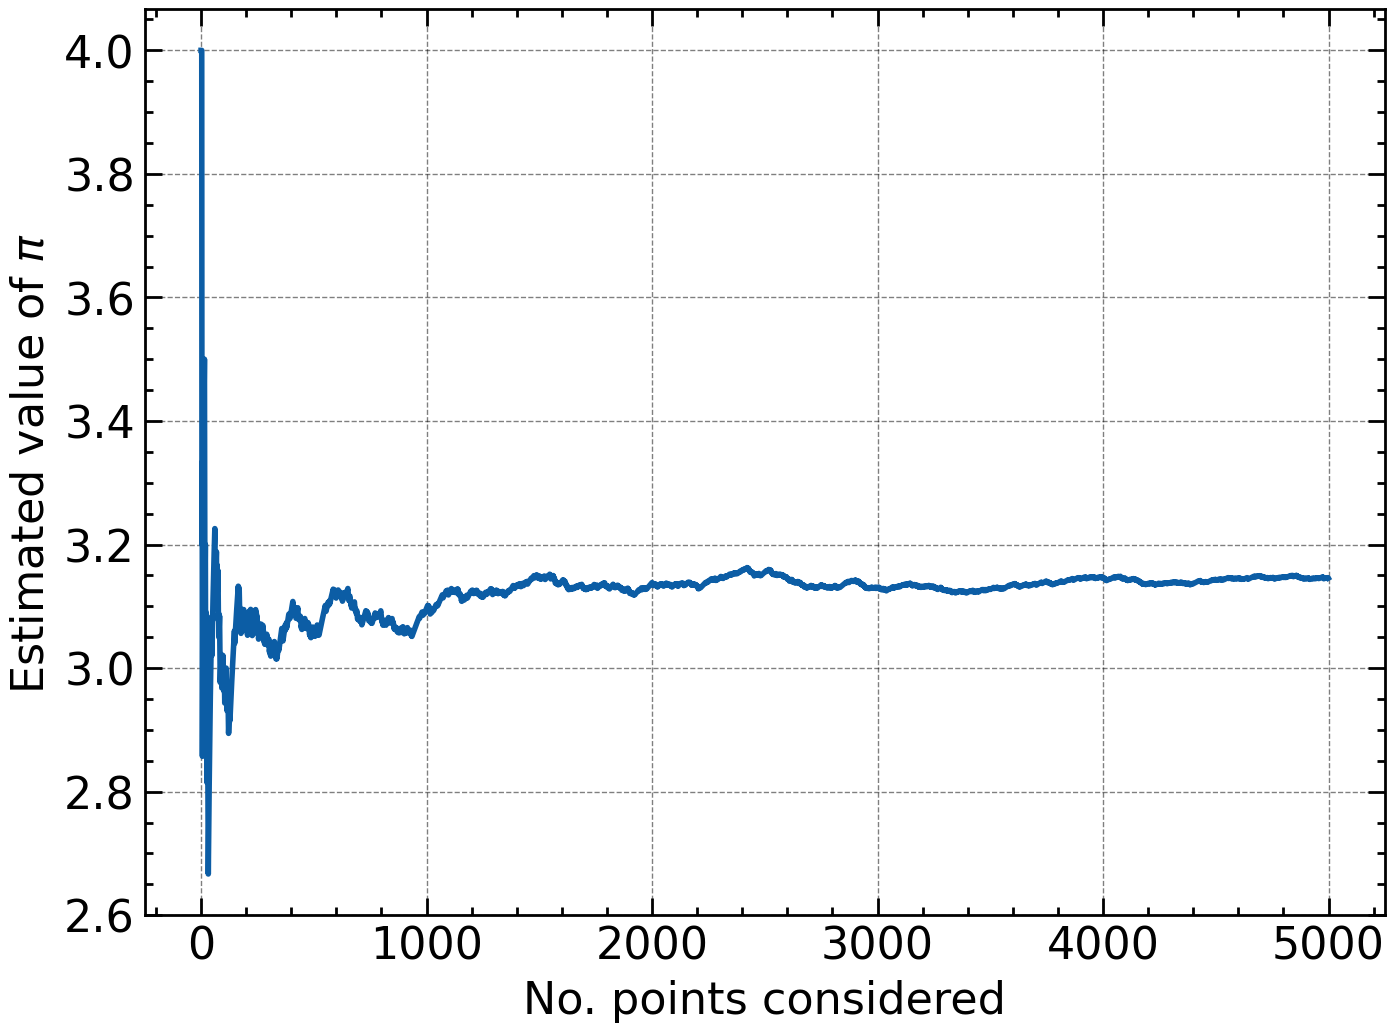

In [11]:
circle_points = 0
square_points = 0
pi = []

for i in origin_dist:
    if i <= 1:
        circle_points += 1
    square_points += 1
    temp = 4 * circle_points/square_points
    pi.append(temp)
pi = np.array(pi)

X = []
for i in range (0,5000):
    X.append(i)

plt.figure(dpi=200)
plt.xlabel('No. points considered')
plt.ylabel(r'Estimated value of $\pi$')
plt.plot(X, pi)

In [12]:
pi[-1]

3.1456

## Extending the problem to 3 dimensions

C:\Users\priya\AppData\Local\Temp\ipykernel_23548\870639106.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


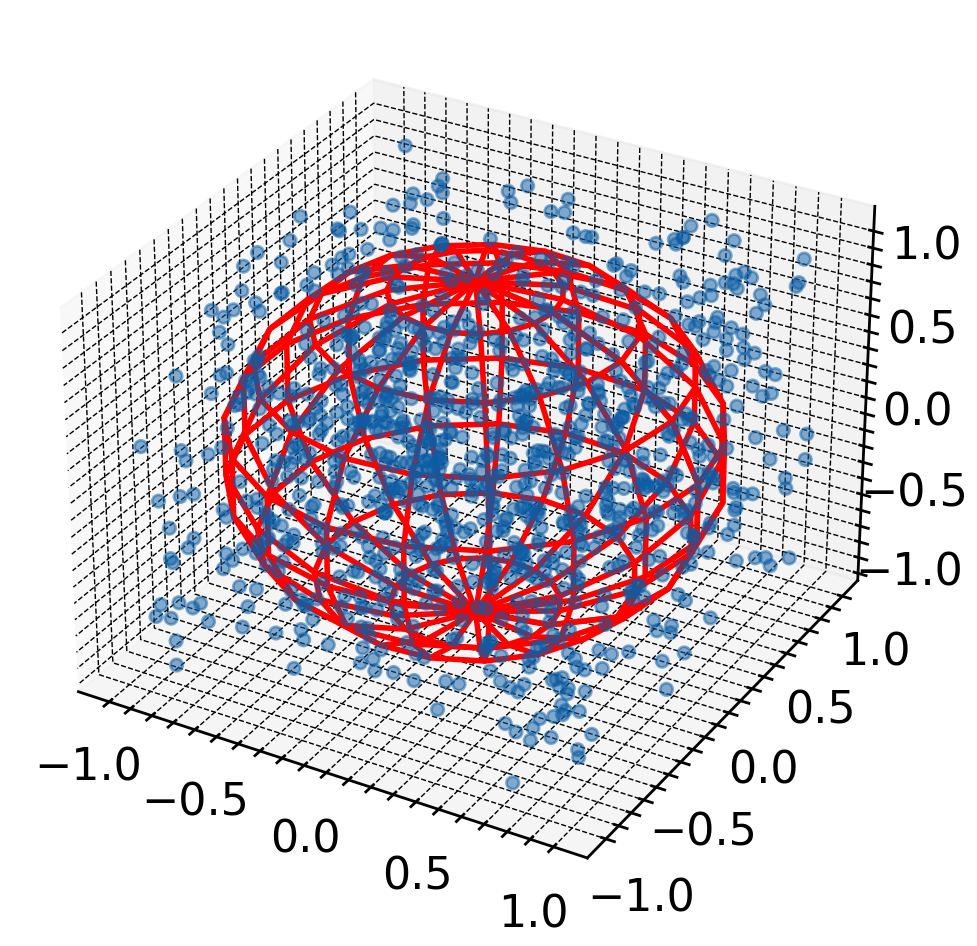

In [15]:
fig = plt.figure(dpi=200)
ax = fig.gca(projection='3d')
#ax.set_aspect("equal")

x_rand = np.random.uniform(-1, 1, 1000)
y_rand = np.random.uniform(-1, 1, 1000)
z_rand = np.random.uniform(-1, 1, 1000)

origin_dist = x_rand**2 + y_rand**2 + z_rand**2

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="r")
ax.scatter(x_rand, y_rand, z_rand, alpha=0.5)

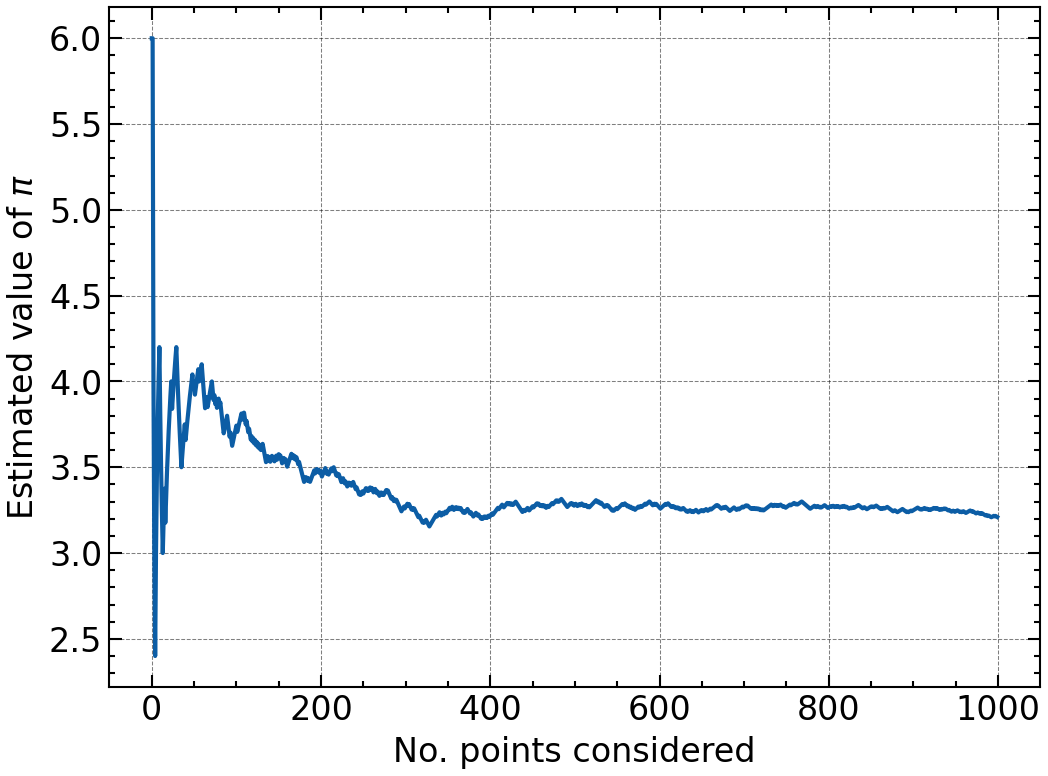

In [16]:
sphere_points = 0
cube_points = 0
pi = []

for i in origin_dist:
    if i <= 1:
        sphere_points += 1
    cube_points += 1
    temp = 6 * sphere_points/cube_points
    pi.append(temp)
pi = np.array(pi)

X = []
for i in range (0,1000):
    X.append(i)

plt.figure(dpi=150)
plt.xlabel('No. points considered')
plt.ylabel(r'Estimated value of $\pi$')
plt.plot(X, pi)

In [17]:
pi[-1]

3.21

## The Pudding Problem

Recipe:

$\bullet$ 2 cups of milk

$\bullet$ 2 eggs

$\bullet$ 100 g sugar

$\bullet$ 2 slices of bread

$\bullet$ 100 g of almonds

Given the price distributions of each item, calculate the mean cost of a pudding including a minimum profit of Rs. 10

Average price is  119.28496798644008


Text(0.5, 0, 'Prices')

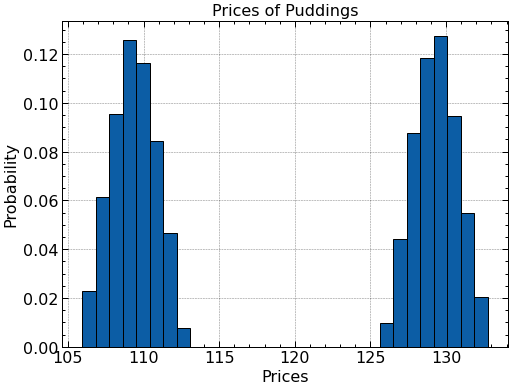

In [19]:
n = 20000
milk = np.random.uniform(18, 20, n)
E = [2, 2.5, 3]
egg = np.random.choice(E, n, [0.2, 0.5, 0.3])
sugar = np.random.uniform(20, 23, n)
bread = np.random.normal(25, 1, n)

A = [500, 700]
almonds = np.random.choice(A, n, [0.7, 0.3])

P = np.zeros(n)  # Initializing P array

for i in range(n):
    P[i] = 2 * milk[i] + 2 * egg[i] + sugar[i] / 10 +  bread[i] / 6 + almonds[i] / 10+10

# Optional: Print the resulting array
print('Average price is ',sum(P)/n)

plt.hist(P,bins=30,density=True,ec='black')
plt.title('Prices of Puddings')
plt.ylabel('Probability')
plt.xlabel('Prices')

## Integration using Monte Carlo

The Monte Carlo process uses the theory of large numbers and random sampling to approximate values that are very close to the actual solution of the integral.

$$\left< f(x) \right> = \dfrac{1}{b-a} \int^{b}_{a} f(x) dx$$
$$\Rightarrow (b-a) \left< f(x) \right> = \int^{b}_{a} f(x) dx$$
$$\Rightarrow (b-a) \dfrac{1}{N} \sum_{i=1}^{N} f(x_i) \approx \int^{b}_{a} f(x) dx$$

N = no. of terms used for approximation of the values.

Let us now try and find the value of $\int_{0}^{1} x^{2}\ dx$ using Monte Carlo Integration and compare it with the known value of 0.333.

The value calculated using Monte Carlo Integration is 0.3328256449201353 whereas the actual calculated value is 0.333


Text(0.5, 0, 'Areas')

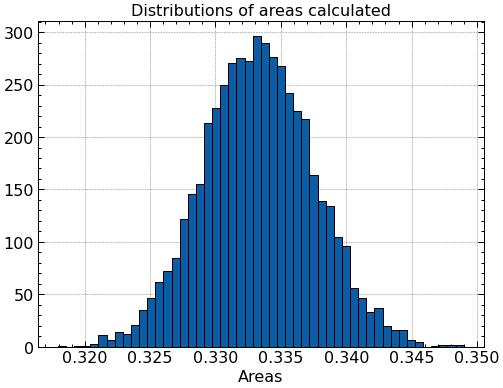

In [29]:
a = 0
b = 1
N = 5000

def f(x):
	return x**2

plt_vals = []

for i in range(N):
	
	ar = np.zeros(N)

	for i in range (len(ar)):
		ar[i] = np.random.uniform(a,b)

	integral = 0.0

	for i in ar:
		integral += f(i)

	res = (b-a)/float(N)*integral

	plt_vals.append(res)
    
print("The value calculated using Monte Carlo Integration is {} whereas the actual calculated value is 0.333".format(res))
plt.title("Distributions of areas calculated")
plt.hist (plt_vals, bins=50, ec="black")
plt.xlabel("Areas")

## Double Integration using Monte Carlo

We want to compute the double integral of a function $f(x, y)$ over a rectangular region defined by $a \leq x \leq b$ and $c \leq y \leq d$. The Monte Carlo method approximates this integral by randomly sampling points within the region and evaluating the function at those points.

$\bullet$ Sampling: We generate `num_samples` random points `(x, y)` within the integration region. These points are uniformly distributed within the rectangle, meaning that any point has an equal chance of being selected.

$\bullet$ Evaluation: For each sampled point `(x, y)`, we evaluate the function `f(x, y)` to obtain a function value.

$\bullet$ Calculation of Total: We sum up all the function values obtained from step 2 to get the total. Let's denote this sum as `total`.

$\bullet$ Area Calculation: The total area of the rectangular region is given by `area = (b - a) * (d - c)`. This represents the area over which we are integrating.

$\bullet$ Result Calculation: The result of the double integral is approximated by multiplying the average function value `(total / num_samples)` by the area of the region `(area)`. This can be expressed as `result = (area / num_samples) * total`.

The Monte Carlo method works based on the idea of the law of large numbers. As the number of samples `(num_samples)` increases, the approximation of the integral becomes more accurate. The randomness in the sampling helps capture the behavior of the function across the region, leading to a good estimation of the integral.

By repeating this process for a sufficiently large number of samples, the Monte Carlo method provides a numerical approximation of the double integral. The accuracy of the approximation improves as the number of samples increases.

C:\Users\priya\AppData\Local\Temp\ipykernel_21608\1165995160.py:35: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(x_coords, y_coords, bins=bins, cmap='Blues')
C:\Users\priya\AppData\Local\Temp\ipykernel_21608\1165995160.py:41: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


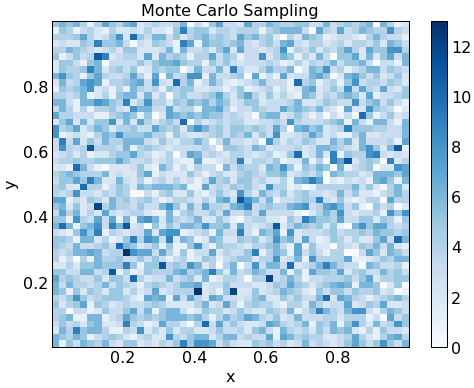

The double integral is: 0.6602015614909231


In [30]:
def double_integration_monte_carlo(f, a, b, c, d, num_samples):
    points = []  # Store sampled points
    total = 0.0
    for _ in range(num_samples):
        x = np.random.uniform(a, b)
        y = np.random.uniform(c, d)
        points.append((x, y))
        total += f(x, y)
    
    area = (b - a) * (d - c)
    result = (area / num_samples) * total
    return result, points

def example_function(x, y):
    return x**2 + y**2

# Define the integration limits
a = 0
b = 1
c = 0
d = 1

# Number of samples to use
num_samples = 10000

# Perform double integration using Monte Carlo method
result, points = double_integration_monte_carlo(example_function, a, b, c, d, num_samples)

# Extract x and y coordinates from sampled points
x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

# Create a 2D histogram
bins = 50
plt.hist2d(x_coords, y_coords, bins=bins, cmap='Blues')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Monte Carlo Sampling')

plt.colorbar()
plt.show()

# Print the result
print("The double integral is:", result)

# Markov Chain Monte Carlo

## Metropolis Hastings Algorithm

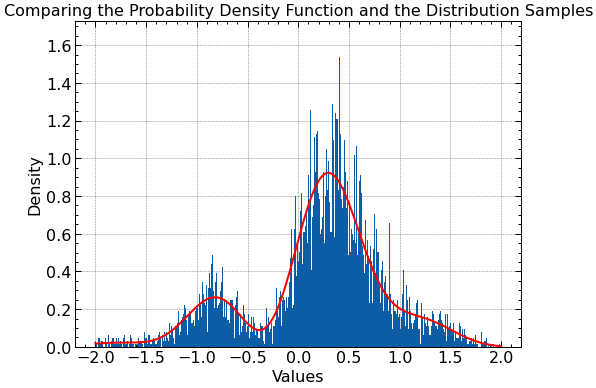

In [4]:
def normal (x): #target distribution
    probX = np.exp(-x**2) * (2 + np.sin(x*5) + np.sin(x*2))
    return probX

def samples(p):
    unif = np.random.uniform(0,1)
    if unif >= p:
        return False
    else:
        return True
    
def gaussian_mcmc(hops):
    states = []
    burn_in = int(0.2*hops)
    current = np.random.uniform(-2, 2)
    
    for i in range(hops):
        states.append(current)
        movement = np.random.uniform(-2,2)
        
        curr_prob = normal(x=current)
        move_prob = normal(x=movement)
        
        acceptance = min(move_prob/curr_prob,1)
        if samples(acceptance):
            current = movement
    return states[burn_in:]
    
lines = np.linspace(-2,2,1000)
dist_curve = np.array([normal(l) for l in lines])

normalisation_factor = integrate.trapezoid(dist_curve, lines)
normalised_dist = dist_curve/normalisation_factor

dist = gaussian_mcmc(10000)
plt.hist(dist,density=True,bins=500) 
plt.plot(lines,normalised_dist,color='r')
plt.title('Comparing the Probability Density Function and the Distribution Samples')
plt.ylabel('Density')
plt.xlabel('Values')
plt.savefig("Whacky_Dist.pdf",
            bbox_inches ="tight",
            pad_inches = 1,
            format="pdf")

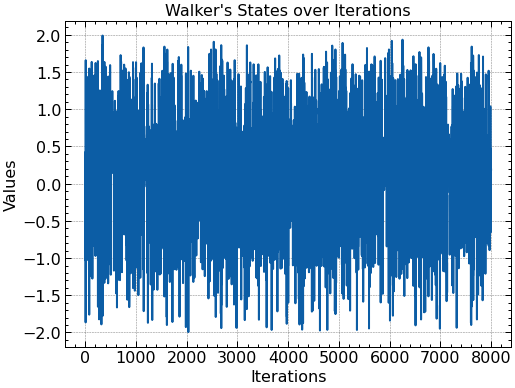

In [5]:
x = [i for i in range (8000)]
plt.plot(x, dist)
plt.title('Walker\'s States over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.savefig("Whacky_Dist_Walker.pdf",
            bbox_inches ="tight",
            pad_inches = 1,
            format="pdf")

## For a Gaussian Function with Multiple Walkers

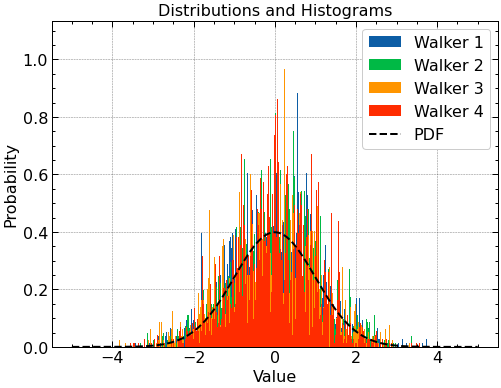

In [6]:
def target_dist(x, mu, sigma): #sample generator (gaussian)
    return (1 / (sigma * np.sqrt(2*np.pi))) * np.exp(- 0.5 * ((x-mu)/sigma)**2) 

def accept_reject(acceptance_prob):
    u = np.random.uniform(0,1)
    if u >= acceptance_prob:
        return False
    else:
        return True

def mcmc(hops, mu, sigma):
    states0 = []
    states1 = []
    states2 = []
    states3 = []
    burn_in = 0
    current_state0 = np.random.uniform(-5,5)
    current_state1 = np.random.uniform(-5,5)
    current_state2 = np.random.uniform(-5,5)
    current_state3 = np.random.uniform(-5,5)



    
    for i in range(hops):
        states0.append(current_state0)
        states1.append(current_state1)
        states2.append(current_state2)
        states3.append(current_state3)
        next_cand0 = np.random.uniform(-5,5)
        next_cand1 = np.random.uniform(-5,5)
        next_cand2 = np.random.uniform(-5,5)
        next_cand3 = np.random.uniform(-5,5)
        
        curr_prob0 = target_dist(x=current_state0,mu=mu,sigma=sigma)
        move_prob0 = target_dist(x=next_cand0,mu=mu,sigma=sigma)
        
        curr_prob1 = target_dist(x=current_state1,mu=mu,sigma=sigma)
        move_prob1 = target_dist(x=next_cand1,mu=mu,sigma=sigma)
        
        curr_prob2 = target_dist(x=current_state2,mu=mu,sigma=sigma)
        move_prob2 = target_dist(x=next_cand2,mu=mu,sigma=sigma)
        
        curr_prob3 = target_dist(x=current_state3,mu=mu,sigma=sigma)
        move_prob3 = target_dist(x=next_cand3,mu=mu,sigma=sigma)
    
        acceptance_prob0 = min(move_prob0/curr_prob0,1)
        acceptance_prob1 = min(move_prob1/curr_prob1,1)
        acceptance_prob2 = min(move_prob2/curr_prob2,1)
        acceptance_prob3 = min(move_prob3/curr_prob3,1)
    
        if accept_reject(acceptance_prob0):
            current_state0 = next_cand0
        if accept_reject(acceptance_prob1):
            current_state1 = next_cand1
        if accept_reject(acceptance_prob2):
            current_state2 = next_cand2
        if accept_reject(acceptance_prob3):
            current_state3 = next_cand3
    return (states0[burn_in:], states1[burn_in:], states2[burn_in:], states3[burn_in:])
        
x_axis = np.linspace(-5, 5, 1000)
dist_curve = [target_dist(l,0,1) for l in x_axis]
dist0, dist1, dist2, dist3 = mcmc(10000, mu=0, sigma=1)
plt.hist(dist0,density=True,bins=1000,label='Walker 1') 
plt.hist(dist1,density=True,bins=1000,label='Walker 2') 
plt.hist(dist2,density=True,bins=1000,label='Walker 3') 
plt.hist(dist3,density=True,bins=1000,label='Walker 4') 
plt.plot(x_axis,dist_curve,'--',color='black',label='PDF')
plt.ylabel('Probability')
plt.xlabel('Value')
plt.title('Distributions and Histograms')
plt.legend()
plt.savefig("Gaussian.pdf",
            bbox_inches ="tight",
            format="pdf")

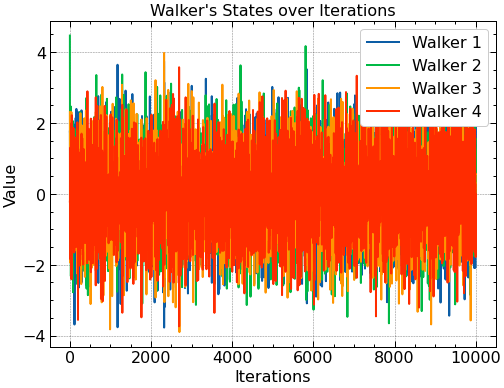

In [7]:
x = [i for i in range (10000)]
plt.plot(x, dist0, label='Walker 1')
plt.plot(x, dist1, label='Walker 2')
plt.plot(x, dist2, label='Walker 3')
plt.plot(x, dist3, label='Walker 4')
plt.title('Walker\'s States over Iterations')
plt.ylabel('Value')
plt.xlabel('Iterations')
plt.legend(loc='upper right')
plt.savefig("Gaussian_Multi_Walkers.pdf",
            bbox_inches ="tight",
            format="pdf")

## Extending this to 2 Dimensions/Parameters

In [9]:
def target_dist(x, y): #sample generator (gaussian)
    return (np.exp(-x**2)*(4+np.sin(5*x)))+(np.exp(-y**2)*(4+np.sin(2*y)-4*np.cos(3*y))) 

def accept_reject(acceptance_prob):
    u = np.random.uniform(0,1)
    if u >= acceptance_prob:
        return False
    else:
        return True

def mcmc(hops):
    statesx = []
    statesy = []

    burn_in = int(0.2*hops)
    current_statex = np.random.uniform(-5,5)
    current_statey = np.random.uniform(-5,5)




    
    for i in range(hops):
        statesx.append(current_statex)
        statesy.append(current_statey)

        next_candx = np.random.uniform(-5,5)
        next_candy = np.random.uniform(-5,5)

        
        curr_prob = target_dist(x=current_statex,y=current_statey)
        move_prob = target_dist(x=next_candx,y=next_candy)

    
        acceptance_prob = min(move_prob/curr_prob,1)
        
        if accept_reject(acceptance_prob):
            current_statex = next_candx
            current_statey = next_candy
            
    return (statesx[burn_in:], statesy[burn_in:])

### Contour (Gradient) Plot of the Target Distribution

C:\Users\priya\AppData\Local\Temp\ipykernel_55108\687841412.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Target Distribution')


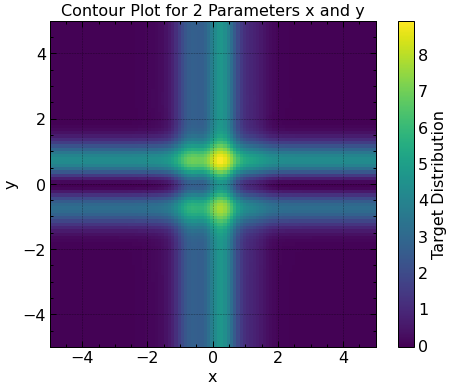

In [10]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(x, y)

Z = target_dist(X, Y)

plt.imshow(Z, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower')
plt.colorbar(label='Target Distribution')
plt.title('Contour Plot for 2 Parameters x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("Contour_Plot.pdf",
            bbox_inches ="tight",
            format="pdf")

### Scatter plot for the two parameters determined using MCMC

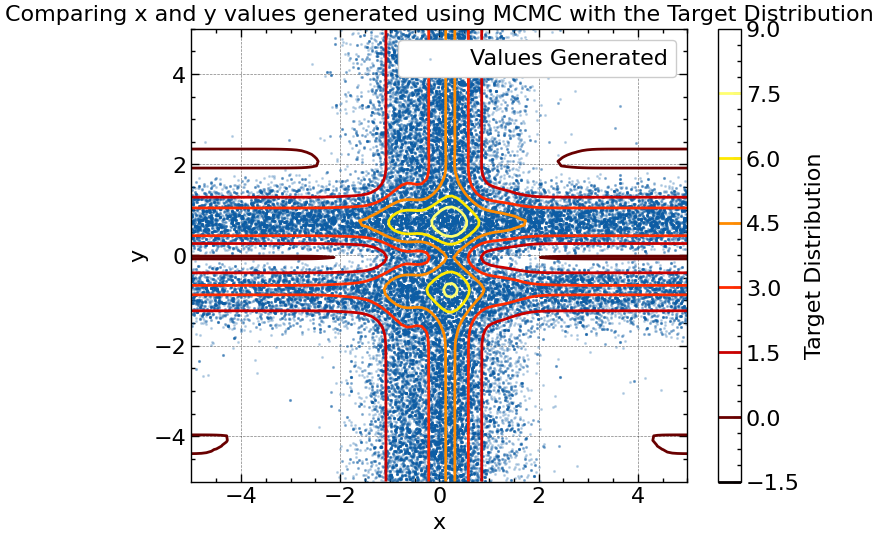

In [11]:
hops = 100000
statesx, statesy = mcmc(hops)
plt.figure(dpi=100)
plt.scatter(statesx, statesy, s=1.5, alpha=0.2,label='Values Generated')
plt.contour(X,Y,Z,alpha=1,cmap=plt.get_cmap('hot'))
plt.colorbar(label='Target Distribution')
plt.title('Comparing x and y values generated using MCMC with the Target Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig("Contour+Walker.pdf",
            bbox_inches ="tight",
            format="pdf")

Text(0, 0.5, 'x and y values')

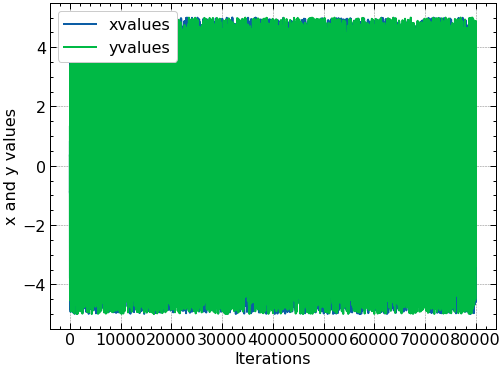

In [39]:
x = [i for i in range (80000)]
plt.plot(x, statesx, label='xvalues')
plt.plot(x, statesy, label='yvalues')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('x and y values')

## Multiple Walkers for Estimating 2 Parameters using MCMC

C:\Users\priya\AppData\Local\Temp\ipykernel_55108\4160069564.py:47: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.hist2d(flattened_samples[:, 0], flattened_samples[:, 1], bins=50, cmap='Blues')
C:\Users\priya\AppData\Local\Temp\ipykernel_55108\4160069564.py:48: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Frequency')


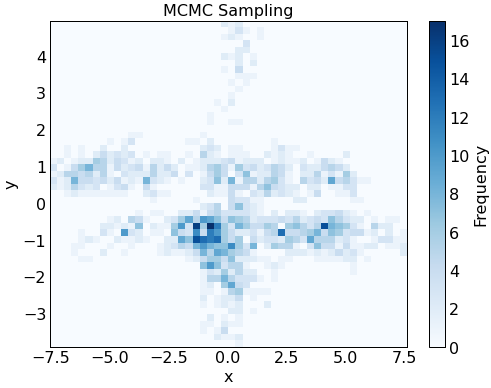

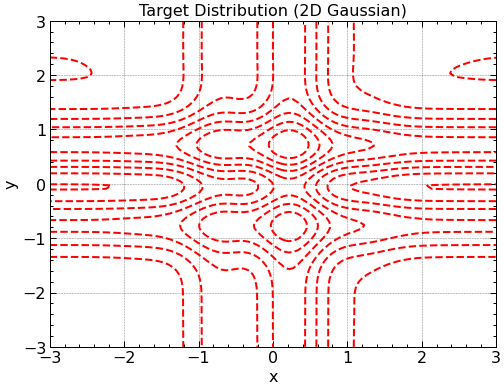

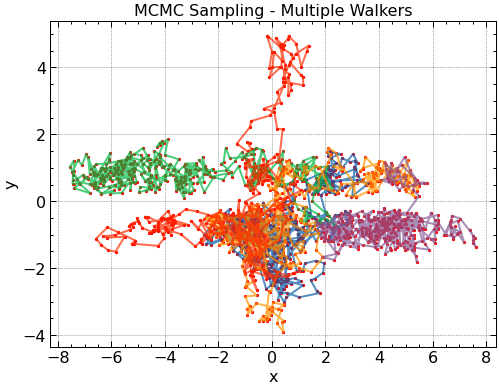

In [16]:
# Define the target distribution (whacky distribution)
def target_distribution(x, y):
    return (np.exp(-x**2)*(4+np.sin(5*x)))+(np.exp(-y**2)*(4+np.sin(2*y)-4*np.cos(3*y))) 

def metropolis_hastings_sampler(n_walkers, n_iterations, proposal_std, burn_in, thinning):
    # Initialize walkers randomly
    walkers = np.random.randn(n_walkers, 2)

    # Initialize storage for samples
    samples = np.zeros((n_walkers, n_iterations, 2))

    for i in range(n_iterations):
        for j in range(n_walkers):
            current_state = walkers[j]

            # Generate candidate sample from proposal distribution
            candidate = current_state + np.random.randn(2) * proposal_std

            # Calculate the acceptance ratio
            acceptance_ratio = target_distribution(candidate[0], candidate[1]) / target_distribution(current_state[0], current_state[1])

            # Accept or reject the candidate sample
            if np.random.uniform() < acceptance_ratio:
                walkers[j] = candidate  # Accept the candidate sample

            samples[j, i] = walkers[j]  # Store the current sample

    # Apply burn-in and thinning
    samples = samples[:, burn_in::thinning, :]

    return samples

# Define the number of walkers, iterations, proposal standard deviation, burn-in, and thinning
n_walkers = 5
n_iterations = 5000
proposal_std = 0.1
burn_in = 1000
thinning = 10

# Run the MCMC sampler
samples = metropolis_hastings_sampler(n_walkers, n_iterations, proposal_std, burn_in, thinning)

# Flatten the samples for histogram plotting
flattened_samples = samples.reshape(-1, 2)

# Plot histogram of samples
plt.hist2d(flattened_samples[:, 0], flattened_samples[:, 1], bins=50, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('x')
plt.ylabel('y')
plt.title('MCMC Sampling')
plt.savefig("2D_Hist.pdf",
            bbox_inches ="tight",
            format="pdf")
plt.show()

# Plot Gaussian curve as reference
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = target_distribution(X, Y)

plt.contour(X, Y, Z, levels=10, colors='r', linestyles='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Target Distribution (2D Gaussian)')
plt.savefig("Contour_Gaussian.pdf",
            bbox_inches ="tight",
            format="pdf")
plt.show()

# Plot the walkers' trajectories and Markov chain
for i in range(n_walkers):
    plt.plot(samples[i, :, 0], samples[i, :, 1], alpha=0.7)
    plt.scatter(samples[i, :, 0], samples[i, :, 1], c='red', s=5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('MCMC Sampling - Multiple Walkers')
plt.grid(True)
plt.savefig("Walkers.pdf",
            bbox_inches ="tight",
            format="pdf")
plt.show()

# Parameter Estimation

Theoretical Model: $$H^{th}(z) = H_{0} \left[ \Omega_m (1+z)^3 + \Omega_\Lambda \right]^{0.5}$$

Consider $H_0 = 67.8$. Find out the most likely value of model parameters, i.e. $\Omega_m$ and $\Omega_\Lambda$ for this data to occur.

For a Gaussian Distribution, probability of occurrence of each data point is: $$P(y_i) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{- \frac{(y^{obs}_{i} - y^{th})^2}{2 \sigma^2}}$$
And the Likelihood is: $$L(x_i|P) = \prod_{i=1}^{N} P(y_i)$$

For the above Theoretical Model, the Likelihood is: 
$$L(x_i|\Omega_m, \Omega_\Lambda) = \prod^{N}_{i=1} \dfrac{1}{\sqrt{2 \pi \sigma^2}}  e^{- \frac{[H^{obs}_i - H_0 \{ \Omega_{m_0} (1+z)^3 + \Omega_{\Lambda_0} \}^{0.5}]^2}{2 \sigma^2}}$$ 
$$\Rightarrow -2 \ln L = \sum \dfrac{(H^{obs}_i - H_0 \{ \Omega_{m_0} (1+z)^3 + \Omega_{\Lambda_0} \}^{0.5} )^2}{\sigma^2} \equiv \chi^2$$

In [15]:
n_observations = 13
z = np.array([0.07,0.04,0.12,0.17,0.1791,0.1993,0.2,0.27,0.28,0.35,0.3519,0.3802,0.4])
H_observed = np.array([69,69,68.6,83,75,75,72.9,77,88.8,82.7,83,83,95])
std_deviation = np.array([19.6,12,26.2,8,4,5,29.6,14,36.6,8.4,14,13.5,17])

H_0=67.8

In [16]:
omega_m = np.linspace(0,1,10000)
omega_lambda = np.linspace(0,1,10000)
chi_square_samples = []
for i in range(10000):
    for j in range(n_observations):
        H_theor=H_0 *(np.sqrt(omega_m[i]*(1+z[j])**3+omega_lambda[i]))
        chi_square=np.sum(((H_observed[j]-H_theor)/std_deviation[j])**2)
    chi_square_samples.append(chi_square)

In [17]:
minimum_chi_square=min(chi_square_samples)
index=chi_square_samples.index(minimum_chi_square)

In [18]:
omega_m[index]

0.5243524352435244

In [19]:
omega_lambda[index]

0.5243524352435244

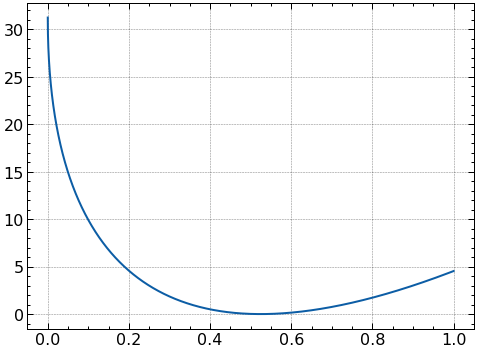

In [22]:
plt.plot(omega_m,chi_square_samples)

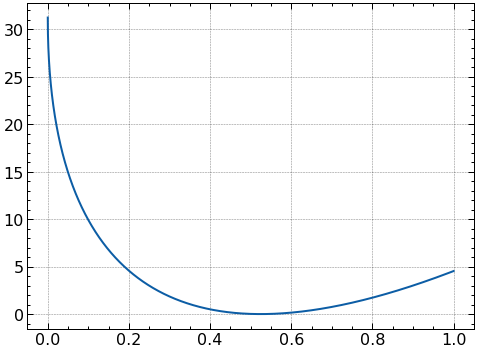

In [48]:
plt.plot(omega_lambda,chi_square_samples)

q1: 63.67939363792684
q2: 61.08411830796334


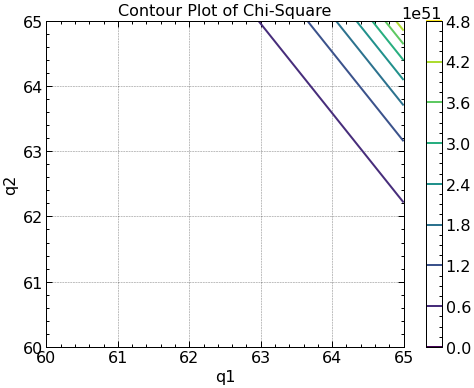

In [27]:
import numpy as np
import matplotlib.pyplot as plt

no_of_observations = 21
z = np.array([0.0907, 0.170, 0.179, 0.199, 0.240, 0.270, 0.352, 0.400, 0.430, 0.480, 0.593, 0.680, 0.781, 0.875, 0.880, 0.900, 1.037, 1.3, 1.430, 1.530, 1.750])
H_observed = np.array([68, 83, 75, 75, 79.69, 77, 83, 95, 86.45, 97, 104, 92, 105, 125, 90, 117, 154, 168, 177, 140, 202])
std_deviation = np.array([12, 8, 4, 5, 2.65, 14, 14, 17, 3.68, 62, 13, 8, 12, 17, 40, 23, 20, 17, 18, 14, 40])

sumz = 0
sumH = 0
sumHz = 0
sumz2 = 0
sum_std = 0

for i in range(no_of_observations):
    sumz += z[i] / (std_deviation[i] ** 2)
    sumH += H_observed[i] / (std_deviation[i] ** 2)
    sumz2 += z[i] ** 2 / (std_deviation[i] ** 2)
    sumHz += z[i] * H_observed[i] / (std_deviation[i] ** 2)
    sum_std += 1 / (std_deviation[i] ** 2)

q1 = (sumz2 * sumH - sumz * sumHz) / (sum_std * sumz2 - (sumz) ** 2)
q2 = (sum_std * sumHz - sumz * sumH) / (sum_std * sumz2 - (sumz) ** 2)

print("q1:", q1)
print("q2:", q2)

H0 = 67.8

def H_th(q, z):
    q1, q2 = q
    return H0 * ((1 + z) ** (1 + q1 - q2)) * np.exp(q2 * z)

def chi_square(q, z, H_observed):
    chi_square_value = np.sum((H_observed - H_th(q, z)) ** 2 / H_th(q, z))
    return chi_square_value
#
q1_range = np.linspace(60,65, 100)
q2_range = np.linspace(60,65, 100)
Q1, Q2 = np.meshgrid(q1_range, q2_range)
Z = np.zeros_like(Q1)

for i in range(len(q1_range)):
    for j in range(len(q2_range)):
        Z[j, i] = chi_square([Q1[j, i], Q2[j, i]], z, H_observed)

plt.contour(Q1, Q2, Z)
plt.xlabel('q1')
plt.ylabel('q2')
plt.title('Contour Plot of Chi-Square')
plt.colorbar()